In [167]:
%%html
<style>
.toc-item > li {
    list-style-type: upper-alpha;
}
</style>

## Kamal Shaham         
## D212 Task 3: Pattern Prediction

<div>
    <h2>Table of Contents</h2>
    <ul class="toc-item">
        <li><a href="#research-question">Research Question</a>
            <ul>
                <li><a href="#goal">Analysis Goal</a></li>
            </ul>
        </li>
        <li><a href="#justification">Market Basket Analysis</a>
            <ul>
                <li><a href="#transactions">Transactions</a></li>
                <li><a href="#assumption">Market Basket Assumption</a></li>
            </ul>
        </li>
         <li><a href="#transformation">Data Transformation</a>
            <ul>
                <li><a href="#association">Association Rules</a></li>
                <li><a href="#values">Association Values</a></li>
                <li><a href="#rules">Relevant Rules</a></li>
            </ul>
        </li>
        <li><a href="#summary">Analysis Summary</a>
        <ul>
                <li><a href="#components">Practical Significance</a></li>
                <li><a href="#variances">Course of Action</a></li>
            </ul>
        </li>
        <li><a href="#panopto">Panopto Demonstration</a></li>
        <li><a href="#thirdparty">Third-party code references</a></li>
        <li><a href="#references">References</a></li>
    </ul>
</div>

## A. Research Question <a id="research-question"></a>

Analyzing patient data is crucial for hospitals to better understand their patients. According to the medical data dictionary, patients submit responses to 8 different hospital survey questions, rating each from 1 to 8. Patients may have certain characteristics depending on their responses to these survey questions, but the actual groupings of survey responses can also be valuable. By analyzing the groupings of responses, hospitals can gain better insights into their patients and tailor care toward specific groups. Hierarchical clustering will be used to analyze these survey questions to determine if there are any significant groupings within the patient responses.

### A2. Analysis Goal <a id="goal"></a>

A goal of this analysis is to analyze patient survey responses using hierarchical clustering to determine if there are any significant groupings within the survey responses. These groupings can provide more context to the data and the ability to compare the meaningfulness of specific survey questions to one another. Hospitals can use these valuable insights to determine the most significant questions for certain groups of patients and tailor care toward them. This analysis can also be used to remove insignificant data, enhance survey question design, and focus on areas that directly impact patient satisfaction and care outcomes.

## B. Technique Justification<a id="justification"></a>

According to a GeeksforGeeks (2023) article, hierarchical clustering is a method of cluster analysis that creates a hierarchical representation of the clusters in a dataset. Clustering begins by treating each individual data point as its own cluster and then progressively merges the nearest clusters in each iteration until a specified stopping criterion is met. The end result of hierarchical clustering is a dendrogram, a tree-like diagram that represents the hierarchical structure and relationships between the clusters. A real-world example of hierarchical clustering is used in gene expression analysis, where researchers cluster similar genes together and separate others into distinct clusters (Jamail & Moussa, 2020).

For this analysis, hierarchical clustering will be performed using scikit-learn's SciPy library. The analysis starts by taking the 10,000 rows of patient data and creating a distance matrix. The `linkage` function within SciPy handles creating the distance matrix, merging the closest clusters, and repeating this process until all data points are clustered into a single cluster. From there, a dendrogram will be created to visualize the cluster groupings and their distances from each other to determine the appropriate number of clusters for this analysis. By adding a label to each observation using SciPy's `fcluster` function, the distribution of survey responses by cluster will be analyzed to determine any areas or patterns of interest. The silhouette score from scikit-learn will be used to evaluate the clustering.

### B2. Assumption of Clustering Technique<a id="assumption"></a>

Since hierarchical clustering commonly uses Euclidean distance, which is very sensitive to variables with different scales, it’s assumed that all variables will be rescaled before computing the distance (An Introduction to Hierarchical Clustering in Python, n.d.). If the variables are on different scales, it can lead to distorted distance measurements, with values in the higher range gaining more focus. For this analysis, the survey responses are already standardized on a scale from 1 to 8, so rescaling will not be required for this particular analysis.

### B3. Python Packages<a id="packages"></a>

Python will be used for this analysis as it provides many intuitive libraries for data science for data processing, visualizations, and machine learning tools. It is a great language choice for data analytics as it allows the user to combine many tools specifically for data analysis with ease. A list of the most significant packages used in this analysis are as follows:

- pandas for importing/exporting the medical dataset as a dataframe
- Seaborn and matplotlib for visualizations of the hierarchical clustering
- Scipy using the linkage, dendogram, and fcluster functions for hierarchical clustering and visualization/labeling of the groupings
- Sklearn using the silhouette score function to evaluate the clustering

## C. Data Preparation<a id="data-preparation"></a>

For this analysis, the preparation of the patient survey results is the main focus. According to the medical dataset dictionary, the patient survey scores are ordered with 1 being the most important and 8 having the lowest importance. To analyze these responses using hierarchical clustering, the responses will need to be reversed so that 8 is the most important response and 1 is the lowest, as it will be easier to understand the responses in ascending order. The SciPy linkage documentation also mentions using float data types for precise distance computations. Therefore, the survey response values will be reversed, converted to floats, and renamed to intuitive column names as in previous courses.

### C2. Initial Variables<a id="variables"></a>

The goal of this analysis is to examine the patient survey responses, focusing solely on the 8 survey response columns for the initial variables in hierarchical clustering. Including other variables might reveal patient conditions or characteristics that could interfere with the objective of comparing groupings of response data. All survey responses are scaled from 1, representing the highest importance, to 8, representing the lowest importance. These will be reversed during the data preparation stage. The survey responses are all ordinal categorical, with values limited to whole numbers from 1 to 8. Each value corresponds to an importance level for the individual patient, making these columns ideal for hierarchical clustering:

- Item1 (timely_admission) - ordinal categorical
- Item2 (timely_treatment) - ordinal categorical
- Item3 (timely_visits) - ordinal categorical
- Item4 (reliability) - ordinal categorical
- Item5 (options) - ordinal categorical
- Item6 (hours_treated) - ordinal categorical
- Item7 (courteous) - ordinal categorical
- Item8 (active_listening) - ordinal categorical


### C3. Data Preparation Steps<a id="prep-steps"></a>

Data preparation involved similar steps to previous courses, including checking for null values, duplicates, and converting survey response columns to meaningful names. The survey responses are the sole focus of this analysis and will be formatted in ascending order, with 1 being of lowest importance, incrementally increasing in importance from there. An interesting point was that converting the survey responses to floats instead of float64 resulted in a significant difference in patient groupings between clusters. As mentioned earlier, the linkage function performs precise distance computations, likely due to the fact that float has a precision of about 7 decimals, whereas float64 has about a 15 decimal precision (How Many Digits Can Float8, Float16, Float32, Float64, and Float128 Contain?, n.d.). The data preparation code is shown below, and the column statistics are outputted to display the distributions.

In [196]:
%matplotlib inline

# importing our statistical libraries
import pandas as pd

# importing our initial dataset
wgu=pd.read_csv('medical_clean.csv')

#viewing first 5 rows and column information
print(wgu.head())
print(wgu.columns)

#checking for missing/null values
print(wgu.isnull().sum())

#checking for duplicate values of any rows
print(wgu.duplicated().any())

# checking for duplicate values based on customer_id unique key
print(wgu.duplicated('Customer_id').any())

# creating a dataframe with only the survey response columns for this analysis
wgu = wgu[["Item1", "Item2", "Item3", "Item4", "Item5", "Item6", "Item7", "Item8"]]

# renaming the columns to intuitive names
wgu = wgu.rename(columns={
    "Item1": "timely_admission",
    "Item2": "timely_treatment",
    "Item3": "timely_visits",
    "Item4": "reliability",
    "Item5": "options",
    "Item6": "hours_treated",
    "Item7": "courteous",
    "Item8": "active_listening"
})

# mapping to reverse the values of responses
reverse_mapping = {8: 1, 7: 2, 6: 3, 5: 4, 4: 5, 3: 6, 2: 7, 1: 8}
# loop through to reverse the order and convert to float64
for col in wgu.columns:
    wgu[col] = wgu[col].map(reverse_mapping).astype('float64')

# view newly prepared dataset
print(wgu.head())
print(wgu.columns)
print(wgu.info())

# variable statistics to check distributions
print(wgu.describe(include='all'))

   CaseOrder Customer_id                           Interaction  \
0          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat       Lng  Population      Area          TimeZone  \
0  34.34960 -86.72508        2951  Suburban   America/Chi

<a id="cleaned-dataset"></a>
## C4. Cleaned Dataset

In [175]:
wgu.to_csv('wgu_cleaned.csv', index=False)

<a id="analysis"></a>
## D. Data Analysis Clustering

This analysis used hierarchical clustering to understand areas of interest or patterns within the survey response results. The scikit-learn documentation details that there are three different linkage strategies, with the Ward strategy specifically mentioned as being ideal for Euclidean metrics (Scikit-learn 2.3. Clustering, n.d.). The average strategy also ran successfully, but the cluster groupings were too close to make a decision on the appropriate number of clusters. The Ward strategy visualized a very clear distinction between the top two clusters, which are color-coded as green and orange in the dendrogram below. The resulting two clusters are added as a column to the dataset using the `fcluster` function for analysis.

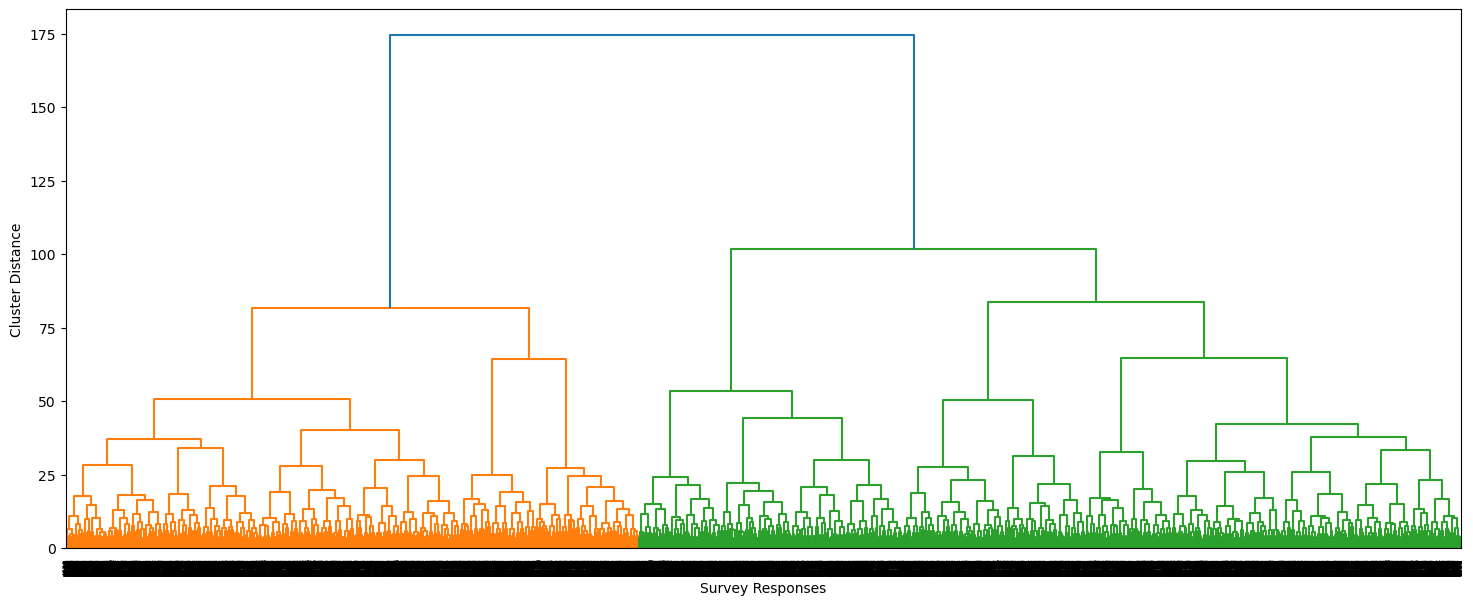

cluster counts:  cluster
1    4105
2    5895
Name: count, dtype: int64


In [198]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# using the linkage function with the Ward method for hierarchical clustering
dmatrix = linkage(wgu, method = 'ward', metric = 'euclidean')
# creating the dendogram and plotting it
plt.figure(figsize = [18,7])
cluster_dendrogram = dendrogram(dmatrix)
plt.ylabel("Cluster Distance");
plt.xlabel("Survey Responses")
plt.show()
# from the scipy documentation the maxclust criterion performed better over the distance criterion to select the top 2 clusters
# adding a cluster column to each row to differentiate between the clusters
wgu['cluster'] = fcluster(dmatrix, 2, criterion='maxclust')
# count the number of data points in each cluster and sort by the cluster column
print("cluster counts: ", wgu['cluster'].value_counts().sort_index())

The dendrogram above shows a visualization of the clusters based on survey responses. The visible difference in distances between the orange and green clusters was the main driver in deciding on two clusters. A case could be made for increasing the cluster counts by lowering the cluster distance threshold; further analysis on increased cluster counts can be performed. By understanding the silhouette score in further sections, the case could be made to revisit the cluster number if the evaluation indicates an overlap in clusters. The first cluster had a total of 4,105 patients, and the second had 5,895 patients.

For visualizing the results of these two clusters, count plots of each survey question by cluster were created below to review the differences in scores between each cluster. The mean of each survey response within each cluster was then calculated using the groupby function and displayed as a grouped bar chart for viewing the distributions:

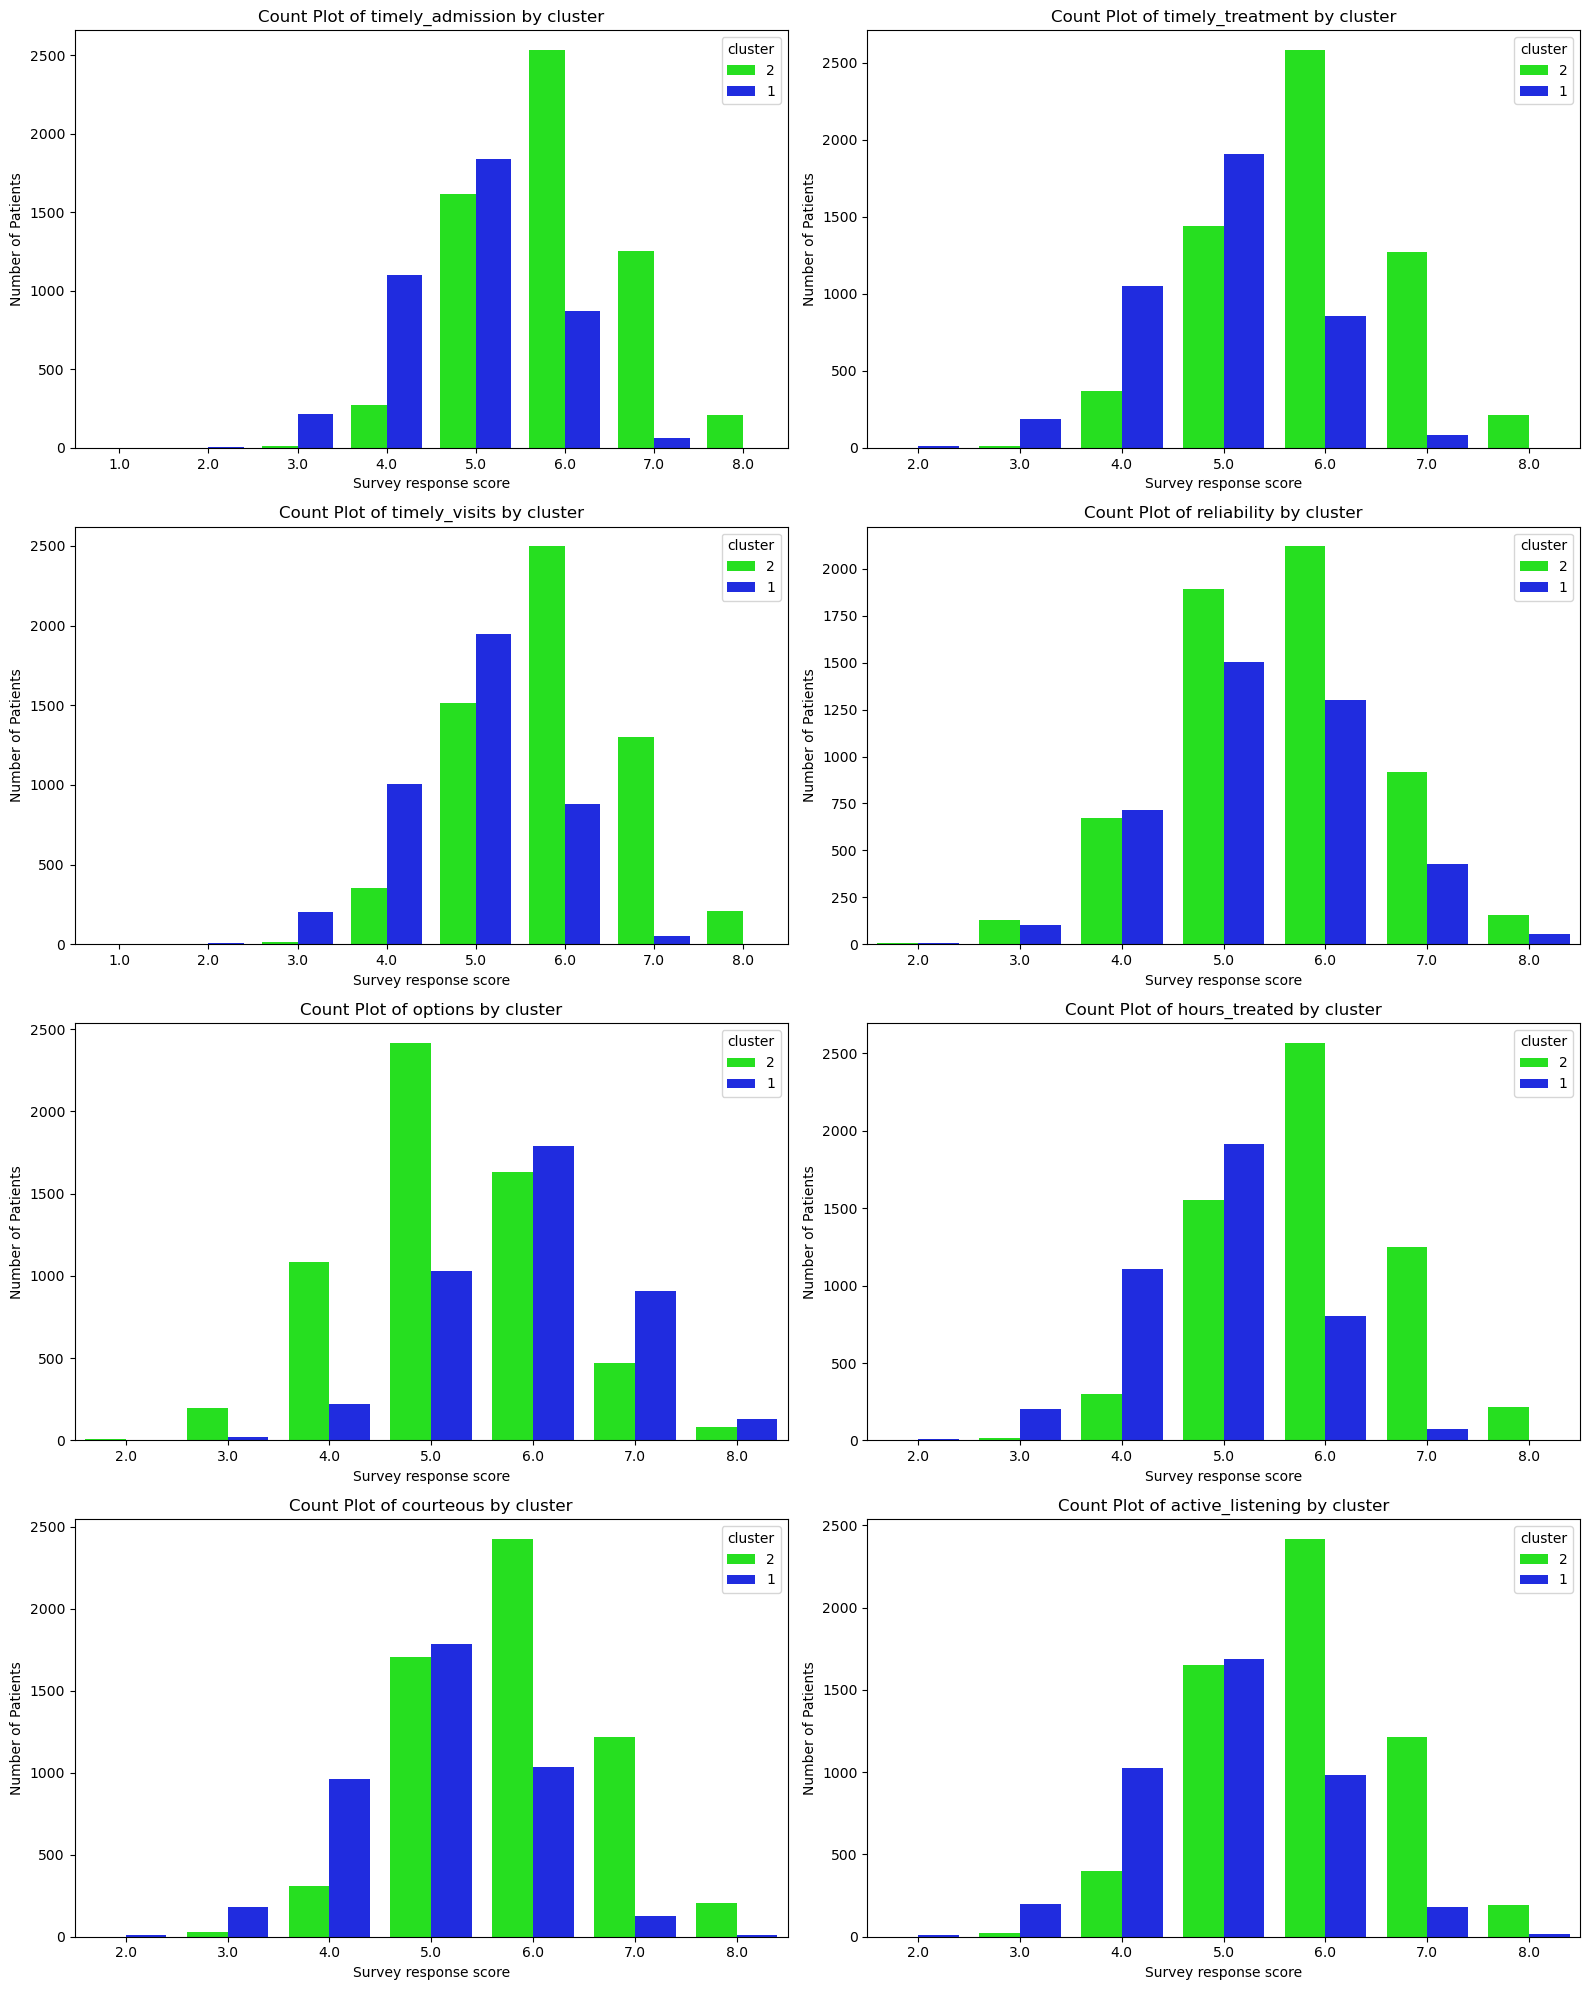

In [179]:
import seaborn as sns

# need to convert cluster column to string
wgu['cluster'] = wgu['cluster'].astype(str)

# setting a color palette for the cluster count plots
palette = sns.color_palette("hsv", len(wgu['cluster'].unique()))

# creating count plots for each survey question based on cluster
plt.figure(figsize=(16, 20))
# not including the last column which is the cluster column
for i, column in enumerate(wgu.columns[:-1], 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=column, hue='cluster', data=wgu, palette=palette)
    plt.title(f'Count Plot of {column} by cluster')
    plt.xlabel('Survey response score')
    plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

         timely_admission  timely_treatment  timely_visits  reliability  \
cluster                                                                   
1                4.865043          4.895493       4.890378     5.336906   
2                5.910263          5.909584       5.905683     5.587956   

          options  hours_treated  courteous  active_listening  
cluster                                                        
1        5.904507       4.853837   4.991474           4.98514  
2        5.223579       5.911790   5.864292           5.84207  


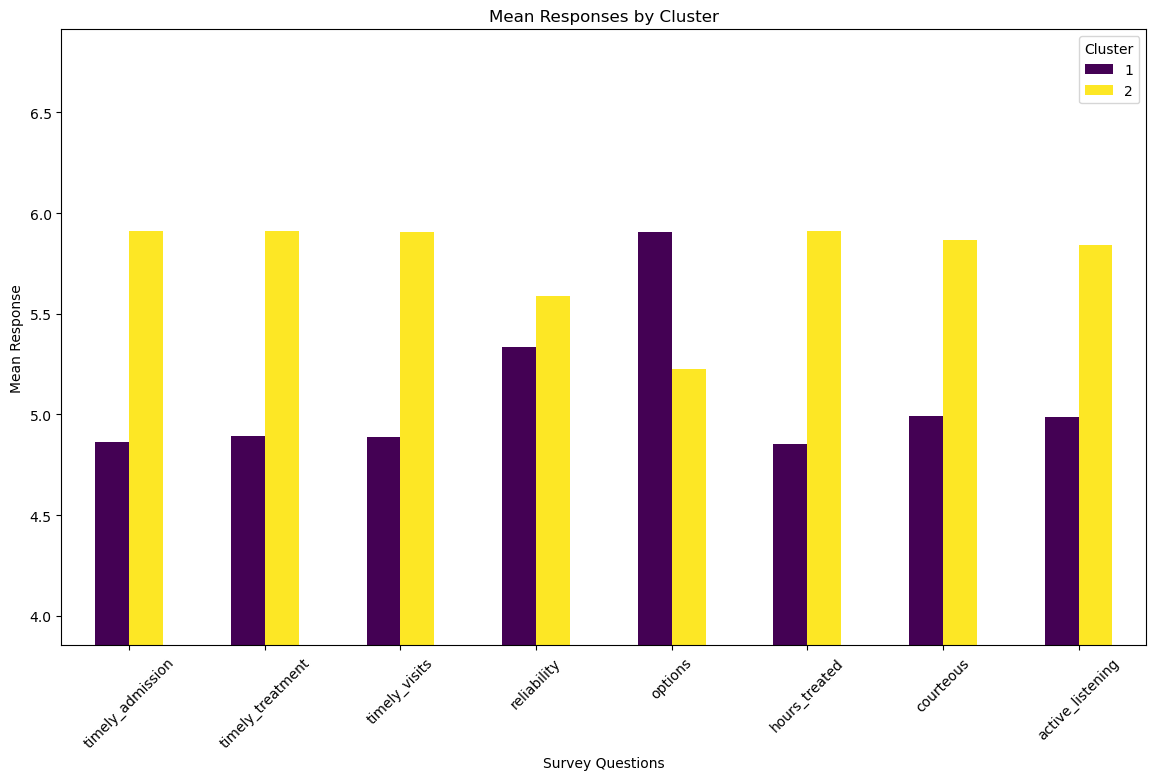

In [208]:
# calculating the mean response for each survey question within each cluster using groupby function
mean_responses = wgu.groupby('cluster').mean()

print(mean_responses)

# getting the min and max values for setting y-axis limits to make the graph meaningful
y_min = mean_responses.values.min()
y_max = mean_responses.values.max()

# plotting grouped bar charts with a y-axis that is the min/max of our mean survey responses
ax = mean_responses.T.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Mean Responses by Cluster')
plt.xlabel('Survey Questions')
plt.ylabel('Mean Response')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.ylim(y_min - 1, y_max + 1)  # Adjust y-axis limits
plt.show()

<a id="cluster-code"></a>
## D2. Code used to perform cluster analysis technique

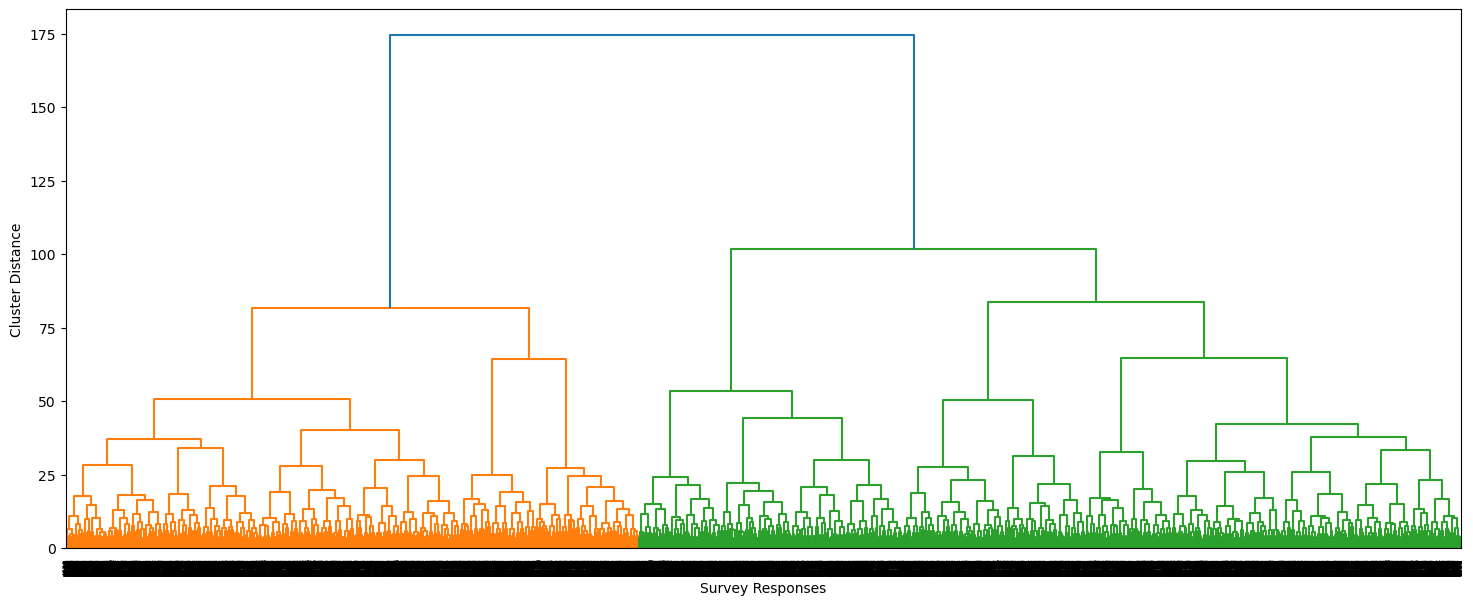

cluster counts:  cluster
1    4105
2    5895
Name: count, dtype: int64


In [202]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

wgu = wgu.drop(columns='cluster')

# using the linkage function with the Ward method for hierarchical clustering
dmatrix = linkage(wgu, method = 'ward', metric = 'euclidean')
# creating the dendogram and plotting it
plt.figure(figsize = [18,7])
cluster_dendrogram = dendrogram(dmatrix)
plt.ylabel("Cluster Distance");
plt.xlabel("Survey Responses")
plt.show()
# from the scipy documentation the maxclust criterion performed better over the distance criterion to select the top 2 clusters
# adding a cluster column to each row to differentiate between the clusters
wgu['cluster'] = fcluster(dmatrix, 2, criterion='maxclust')
# count the number of data points in each cluster and sort by the cluster column
print("cluster counts: ", wgu['cluster'].value_counts().sort_index())

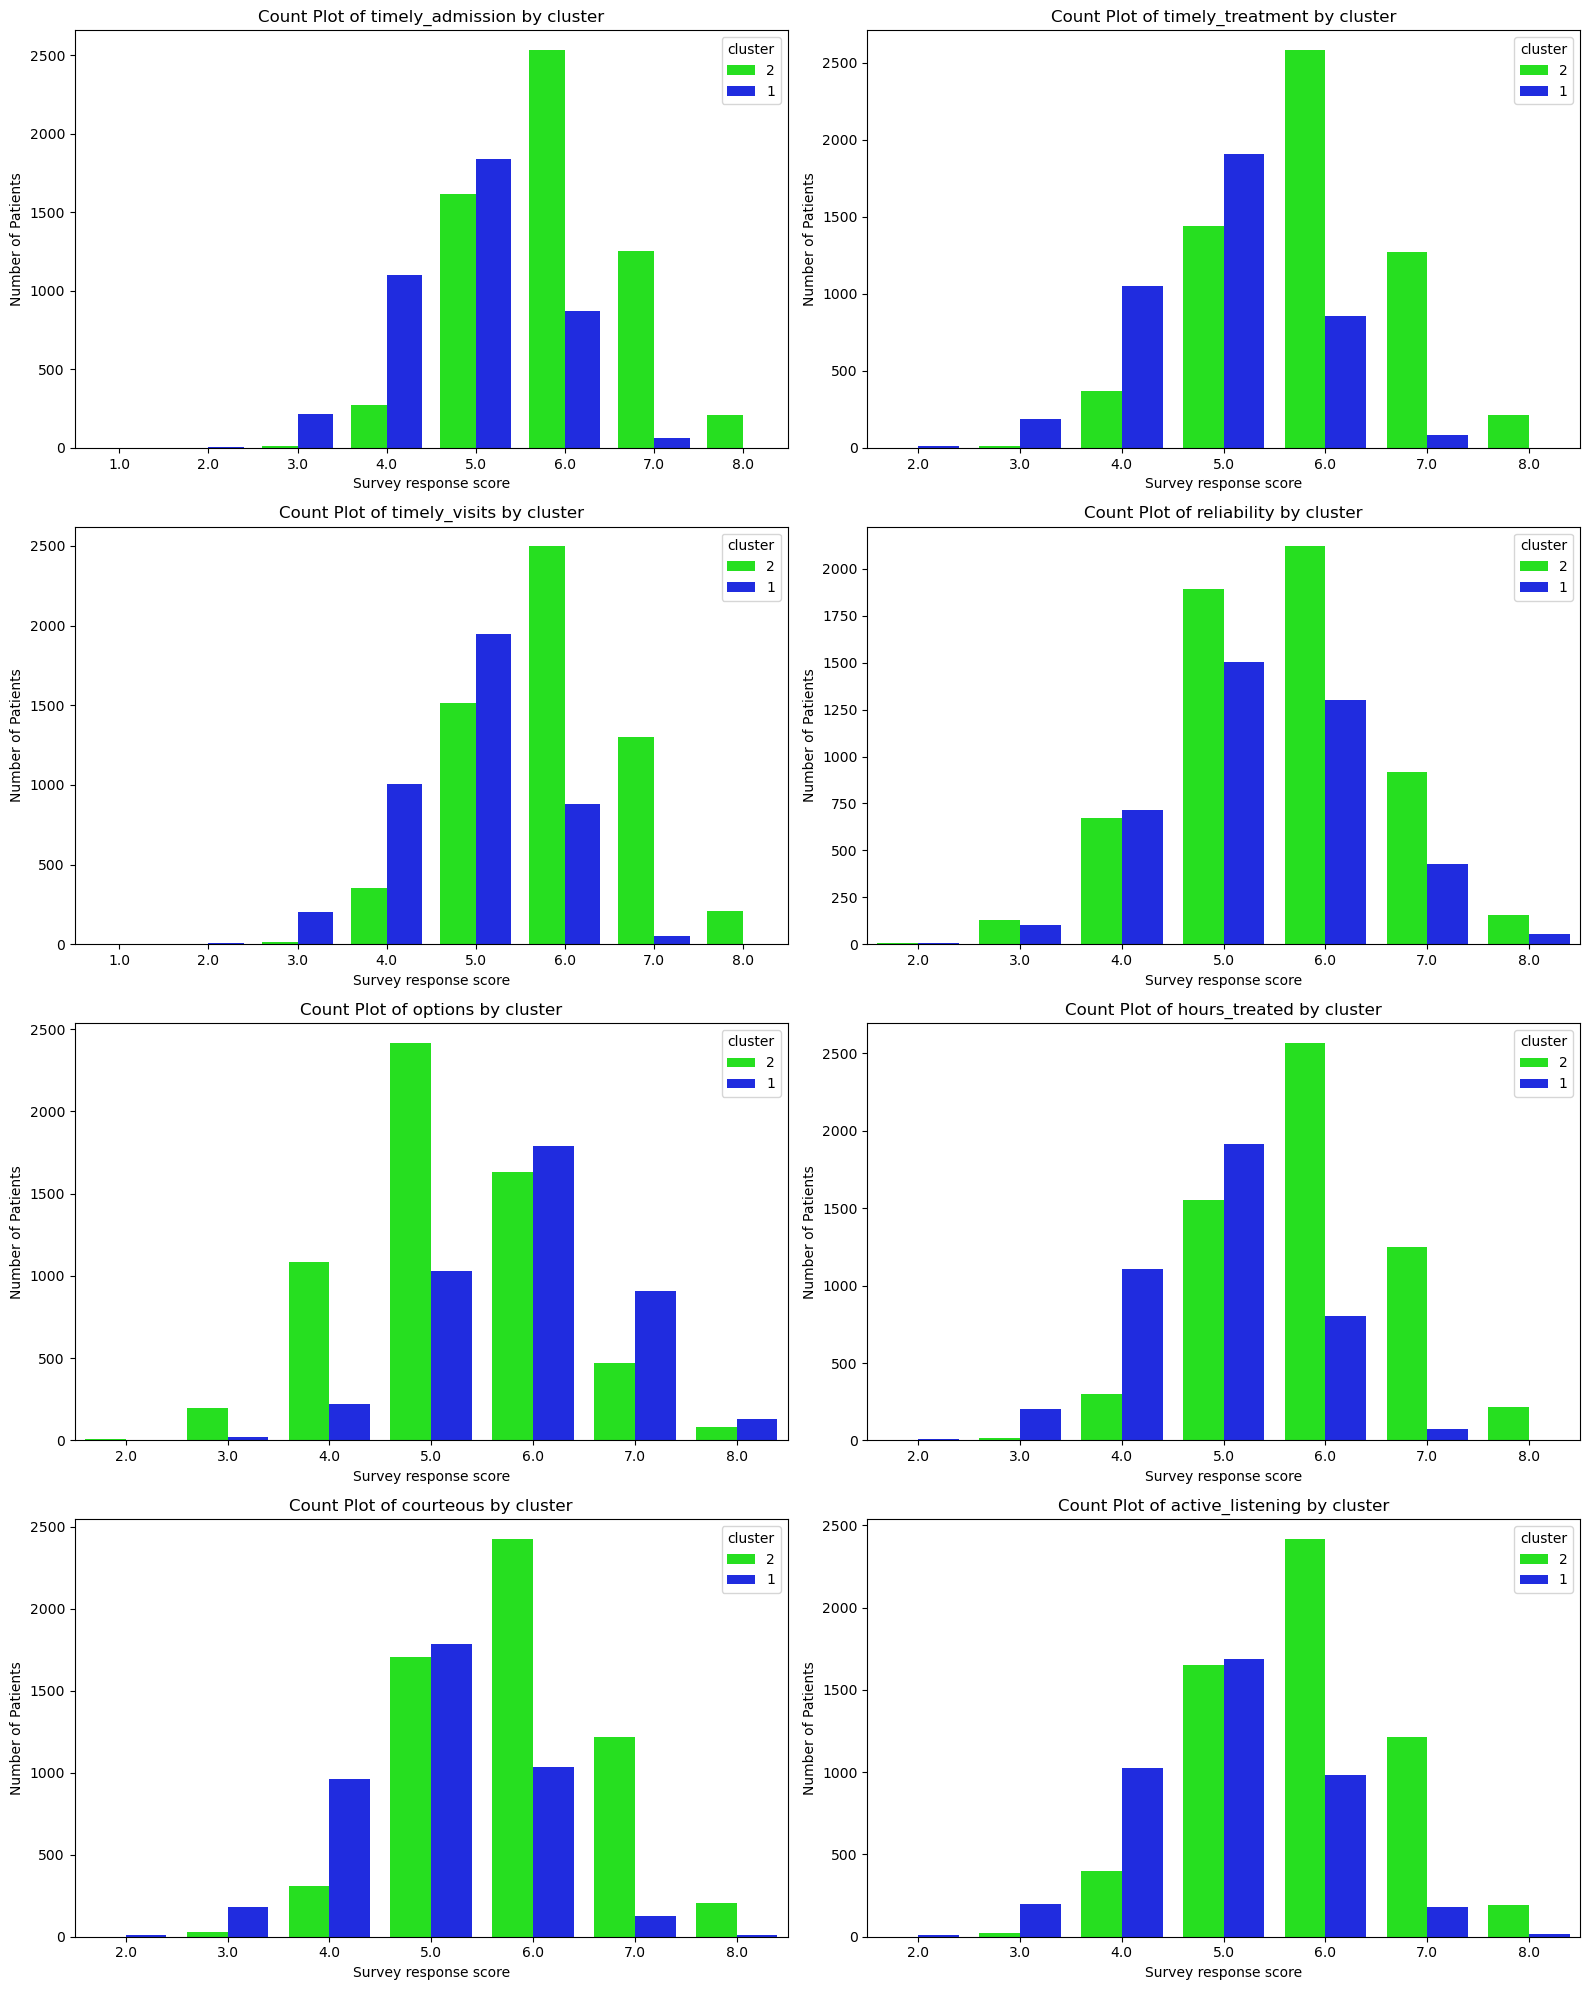

In [219]:
import seaborn as sns

# need to convert cluster column to string
wgu['cluster'] = wgu['cluster'].astype(str)

# setting a color palette for the cluster count plots
palette = sns.color_palette("hsv", len(wgu['cluster'].unique()))

# creating count plots for each survey question based on cluster
plt.figure(figsize=(16, 20))
# not including the last column which is the cluster column
for i, column in enumerate(wgu.columns[:-1], 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=column, hue='cluster', data=wgu, palette=palette)
    plt.title(f'Count Plot of {column} by cluster')
    plt.xlabel('Survey response score')
    plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

         timely_admission  timely_treatment  timely_visits  reliability  \
cluster                                                                   
1                4.865043          4.895493       4.890378     5.336906   
2                5.910263          5.909584       5.905683     5.587956   

          options  hours_treated  courteous  active_listening  
cluster                                                        
1        5.904507       4.853837   4.991474           4.98514  
2        5.223579       5.911790   5.864292           5.84207  


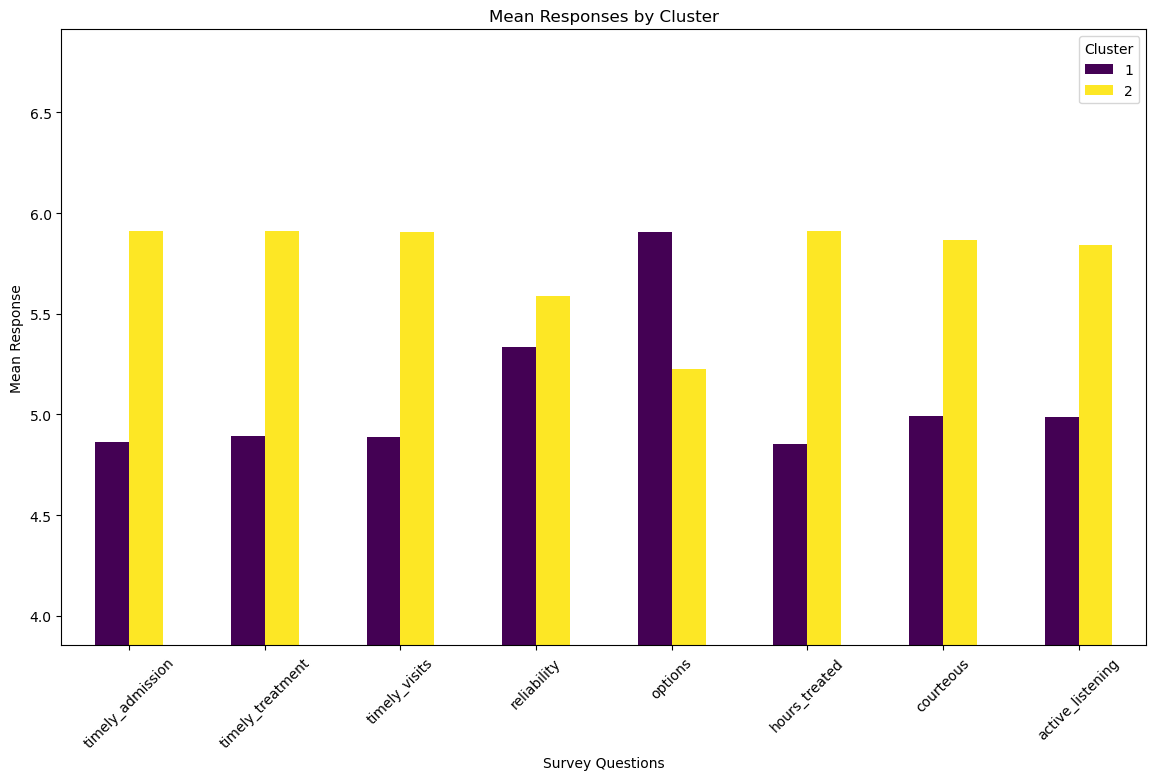

In [215]:
# calculating the mean response for each survey question within each cluster using groupby function
mean_responses = wgu.groupby('cluster').mean()
print(mean_responses)

# getting the min and max values for setting y-axis limits to make the graph meaningful
y_min = mean_responses.values.min()
y_max = mean_responses.values.max()

# plotting grouped bar charts with a y-axis that is the min/max of our mean survey responses
ax = mean_responses.T.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Mean Responses by Cluster')
plt.xlabel('Survey Questions')
plt.ylabel('Mean Response')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.ylim(y_min - 1, y_max + 1)  # Adjust y-axis limits
plt.show()

<a id="cluster-quality"></a>
## E. Data Summary - Cluster Quality

To evaluate the quality of the clusters, a silhouette score was used. According to a GeeksforGeeks (2024) article, a silhouette score is used to assess how well-defined clusters are in a dataset. It quantifies the separation and cohesiveness between clusters. The better defined a cluster, the higher the score, which ranges from -1 to 1. If an object is well-matched to its own cluster but poorly matched to others, its score will be closer to 1. Scores near -1 indicate that the object may be in the wrong cluster.

In [213]:
from sklearn.metrics import silhouette_score

# only taking our wgu survey columns for silhoutte score calculation
wgu_survey = wgu.drop(columns='cluster')
sil_score = silhouette_score(wgu_survey, wgu['cluster'], metric='euclidean')

# printing the silhouette score
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.1484


With a silhouette score of 0.1484, the clustering is not considered optimal, though it could be worse. A score closer to 0 indicates some overlap between clusters, which may not be apparent from the dendrogram but is likely evident when analyzing the actual survey response values. The grouped bar chart of the mean of each survey response by cluster shows a slight difference in response importance, but not a drastic change between the two clusters. Adjusting the number of clusters may prove beneficial for the evaluation of the clustering method.

<a id="results"></a>
## E2. Analysis Results

         timely_admission  timely_treatment  timely_visits  reliability  \
cluster                                                                   
1                4.865043          4.895493       4.890378     5.336906   
2                5.910263          5.909584       5.905683     5.587956   

          options  hours_treated  courteous  active_listening  
cluster                                                        
1        5.904507       4.853837   4.991474           4.98514  
2        5.223579       5.911790   5.864292           5.84207  


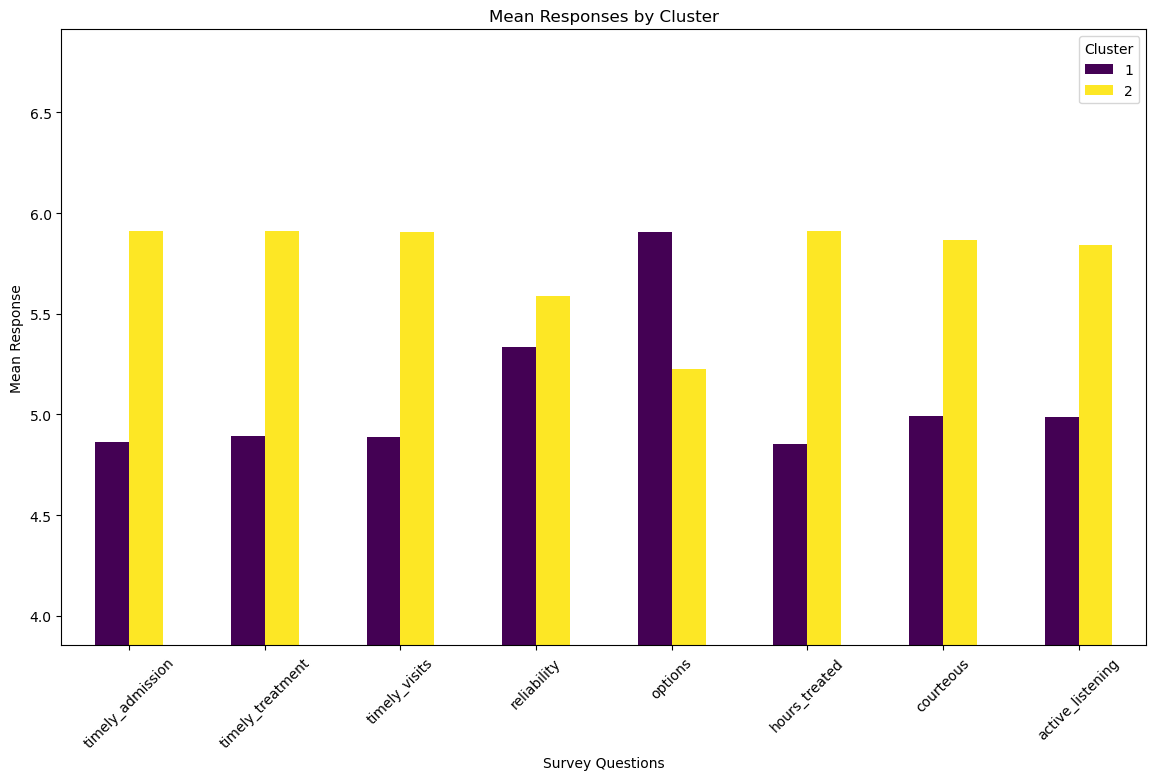

In [210]:
# calculating the mean response for each survey question within each cluster using groupby function
mean_responses = wgu.groupby('cluster').mean()

print(mean_responses)

# getting the min and max values for setting y-axis limits to make the graph meaningful
y_min = mean_responses.values.min()
y_max = mean_responses.values.max()

# plotting grouped bar charts with a y-axis that is the min/max of our mean survey responses
ax = mean_responses.T.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Mean Responses by Cluster')
plt.xlabel('Survey Questions')
plt.ylabel('Mean Response')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.ylim(y_min - 1, y_max + 1)  # Adjust y-axis limits
plt.show()

The results of performing hierarchical clustering on these survey responses showed several differences in response importance between the two clusters. The first cluster indicated a difference in the importance of the options and reliability questions compared to other survey columns. These questions are not expanded upon within the medical data dictionary to provide further context. There was also a slight increase in the importance of courteous staff and active listening for the first cluster. However, for the second cluster, questions 1, 2, 3, 6, 7, and 8 were nearly the same level of importance. When comparing the two clusters, the importance levels for many of the survey questions are deemed less important in the first cluster versus the second.

Taking each cluster as its own view, the majority of questions are rated at nearly the same level of importance with only a couple of exceptions. These exceptions are the reliability and options questions, which are deemed of higher importance in the first cluster but viewed with lower importance in the second cluster. Patients seem to not find these two questions as important if they were grouped into the second cluster.

With the number of patients in both clusters being almost the same, it is difficult to argue that WGU's clinic should deprioritize their attention to the options and reliability questions since patients in the second cluster view them as less important. Since this is still a sizeable group of patients, the questions were not expanded upon within the data dictionary, and given the first cluster of patients view these responses as more important than others as well. Further context, adjustment of the survey questions, and the number of clusters may all play a role in improving these results.

<a id="limitation"></a>
## E3. Data Analysis Limitation

One limitation of this data analysis was the number of clusters used for dividing patient survey results. With a silhouette score of just 0.1484, there is a clear indication of overlap between the two clusters. The dendrogram showed a clear difference in the distance between these two clusters, but the evaluation metric implies there is still overlap. Selecting three or more clusters may provide a higher level of detail when dividing patients by survey results. Using more clusters may reveal differences that were not highlighted with just two clusters. To improve this analysis, further investigation into cluster selection should be performed.

<a id="action"></a>
## E4. Course of Action

Based on the results of this analysis and the mean of each survey response, there is a clear need to provide further detail to the survey questions. Without any context for the actual questions themselves, there is no way to interpret the response results in greater detail. By providing well-defined questions that convey valuable information to the WGU clinic, the results of future analyses should improve. A single word such as "options" is not enough detail to provide meaningful insights to a hospital system. 

These questions should convey detailed areas the hospital would like to improve or monitor for any changes. The results being scored from 1 to 8 and the distributions of values themselves show that a majority of patients are answering within the 4 to 6 range. By shortening this range to 1-3 or 5 at the most, the responses ideally should not continue to average to the middle of the range of allotted scores and provide a broader range of response scores.

<a id="panopto"></a>
## F. Panopto Video Demonstration

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=d03ccdb3-747f-42c5-8223-b18f001bea37


<a id="thirdparty"></a>
## G. Third-party Code References

GeeksforGeeks. (2024, March 21). Clustering metrics in machine learning. GeeksforGeeks. https://www.geeksforgeeks.org/clustering-metrics/ 

Kagumba, J. (2023, April 11). Lyrical Lexicon — Part 5→ Hierarchical Clustering - Joe Kagumba - Medium. Medium. https://medium.com/@jrkagumba/lyrical-lexicon-part-5-hierarchical-clustering-6334482a4cd7 

scipy.cluster.hierarchy.fcluster — SciPy v1.13.1 Manual. (n.d.). https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html 

scipy.cluster.hierarchy.linkage — SciPy v1.13.1 Manual. (n.d.). https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

Scikit-learn 2.3. Clustering. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/clustering.html

<a id="references"></a>
## H. References

An Introduction to Hierarchical Clustering in Python. (n.d.). Datacamp. https://www.datacamp.com/tutorial/introduction-hierarchical-clustering-python 

GeeksforGeeks. (2023, December 12). Hierarchical clustering in data mining. GeeksforGeeks. https://www.geeksforgeeks.org/hierarchical-clustering-in-data-mining/ 

How many digits can float8, float16, float32, float64, and float128 contain? (n.d.). Stack Overflow. https://stackoverflow.com/questions/56514892/how-many-digits-can-float8-float16-float32-float64-and-float128-contain 

Jamail, I., & Moussa, A. (2020). Current State-of-the-Art of Clustering Methods for Gene Expression Data with RNA-Seq. In IntechOpen eBooks. https://doi.org/10.5772/intechopen.94069 

Selecting the number of clusters with silhouette analysis on clustering. (n.d.). Scikit-learn. https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html